# Use FRAUD_ANALY_Template Customized Notebook Template

In [2]:
from snowflake.snowpark import Session
from snowflake.connector.pandas_tools import write_pandas

# Data Science Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')

In [3]:
from fosforml.model_manager.snowflakesession import get_session

my_session = get_session()

In [4]:
df = 'FRAUD_DETECTION_ANALY_MASTER_TABLE'

In [5]:
sf_df = my_session.sql("select * from {}".format(df))

In [9]:
import pandas as pd
fraud_df = sf_df.to_pandas()

# Check Null Values Count

In [7]:
print(fraud_df.isnull().sum())

CREDIT_LIMIT                          0
ACCOUNT_OPENING_DATE                  0
LAST_LOGIN                            0
CUSTOMER_SEGMENT                      0
ACCOUNT_TYPE                          0
DEVICE_USED                           0
NAME                                  0
GENDER                                0
DOB                                   0
AGE                                   0
CUSTOMER_ID                           0
AGE_GROUP                             0
AGE_OF_ACCOUNT                        0
FREQUENCY_OF_TRANSACTIONS             0
CUSTOMER_LOYALTY_SCORE                0
NUMBER_OF_REFUNDS                     0
NUMBER_OF_CHARGEBACKS                 0
CREDIT_UTILIZATION_RATIO              0
CHANGE_IN_SPENDING_BEHAVIOR           0
TRANSACTION_VELOCITY                  0
CUSTOMER_LOYALTY_CATEGORY             0
TIME_SINCE_LAST_TRANSACTION           0
TRANSACTION_ID                        0
TIME                                  0
TRANSACTION_AMOUNT                    0


# Check Shape

In [9]:
fraud_df.shape

(300000, 50)

# Check Basic Information

In [10]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 50 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CREDIT_LIMIT                        300000 non-null  int32  
 1   ACCOUNT_OPENING_DATE                300000 non-null  object 
 2   LAST_LOGIN                          300000 non-null  object 
 3   CUSTOMER_SEGMENT                    300000 non-null  object 
 4   ACCOUNT_TYPE                        300000 non-null  object 
 5   DEVICE_USED                         300000 non-null  object 
 6   NAME                                300000 non-null  object 
 7   GENDER                              300000 non-null  object 
 8   DOB                                 300000 non-null  object 
 9   AGE                                 300000 non-null  object 
 10  CUSTOMER_ID                         300000 non-null  object 
 11  AGE_GROUP                 

# Check Data Description

In [11]:
fraud_df.describe()

,CREDIT_LIMIT,AGE_OF_ACCOUNT,FREQUENCY_OF_TRANSACTIONS,CUSTOMER_LOYALTY_SCORE,NUMBER_OF_REFUNDS,NUMBER_OF_CHARGEBACKS,CREDIT_UTILIZATION_RATIO,CHANGE_IN_SPENDING_BEHAVIOR,TRANSACTION_VELOCITY,TRANSACTION_AMOUNT,MERCHANT_RISK_SCORE,DISTANCE_FROM_HOME_ADDRESS,DISTANCE_FROM_LAST_TRANSACTION,YEAR,ANOMALY_SCORE,FRAUD_INDICATOR,SUSPICIOUS_FLAG,PREVIOUS_FRAUD_REPORTS
count,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,22514.25000,19.996060,50.034980,0.500713,2.497920,2.496617,0.499802,0.500250,4.995991,5001.590509,0.500295,25.018137,24.990567,2020.322290,0.499543,0.053743,0.020493,1.000490
std,11459.54048,11.258217,28.610189,0.288649,1.708461,1.706169,0.288729,0.288782,2.889279,2887.375398,0.289271,14.444339,14.439170,2.198197,0.288596,0.225511,0.141681,0.817923
min,5000.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.080000,0.000000,0.000000,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000
25%,15000.00000,10.000000,25.000000,0.250000,1.000000,1.000000,0.250000,0.250000,2.500000,2496.957500,0.250000,13.000000,12.000000,2018.000000,0.250000,0.000000,0.000000,0.000000
50%,20000.00000,20.000000,50.000000,0.500000,3.000000,2.000000,0.500000,0.500000,5.000000,5003.090000,0.500000,25.000000,25.000000,2020.000000,0.500000,0.000000,0.000000,1.000000
75%,35000.00000,30.000000,75.000000,0.750000,4.000000,4.000000,0.750000,0.750000,7.500000,7503.860000,0.750000,38.000000,37.000000,2022.000000,0.750000,0.000000,0.000000,2.000000
max,40000.00000,39.000000,99.000000,1.000000,5.000000,5.000000,1.000000,1.000000,10.000000,9999.980000,1.000000,50.000000,50.000000,2024.000000,1.000000,1.000000,1.000000,2.000000


# Check Data Description including Objects

In [12]:
fraud_df.describe(include='O')

,ACCOUNT_OPENING_DATE,LAST_LOGIN,CUSTOMER_SEGMENT,ACCOUNT_TYPE,DEVICE_USED,NAME,GENDER,DOB,AGE,CUSTOMER_ID,...,COUNTY,STATE,CITY,QUARTER,MONTH,CROSS_BORDER_TRANSACTION_INDICATOR,NEW_DEVICE_INDICATOR,ANAMOLY_RISK_CATEGORY,MERCHANT_RISK_CATEGORY,FRAUD_FLAG
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,...,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2754,2771,4,4,5,159144,2,23010,64,300000,...,46,10,49,4,12,2,2,4,4,2
top,2017-01-01,2017-01-01,Individual,Business Account,Mobile,Michael Smith,Male,1968-05-12,51,CID0273441,...,Macomb,Michigan,Columbus,Q2,May,No,No,Low Risk,Low Risk,No
freq,955,278,75235,75381,73264,129,150310,30,4932,1,...,12089,30244,11985,78876,26834,270034,239869,76656,76583,283877


In [10]:
Fraud_Detection = fraud_df.copy()

# Sample Data values

In [14]:
Fraud_Detection

,CREDIT_LIMIT,ACCOUNT_OPENING_DATE,LAST_LOGIN,CUSTOMER_SEGMENT,ACCOUNT_TYPE,DEVICE_USED,NAME,GENDER,DOB,AGE,...,MONTH,ANOMALY_SCORE,FRAUD_INDICATOR,SUSPICIOUS_FLAG,PREVIOUS_FRAUD_REPORTS,CROSS_BORDER_TRANSACTION_INDICATOR,NEW_DEVICE_INDICATOR,ANAMOLY_RISK_CATEGORY,MERCHANT_RISK_CATEGORY,FRAUD_FLAG
0,30000,2017-08-17,2017-08-22,Individual,Business Account,Tablet,Andrea Garcia,Female,1991-09-12,33,...,October,0.66,0,0,2,No,No,High Risk,High Risk,No
1,15000,2017-09-13,2018-02-08,Student,Investment Account,Desktop,Victor Ray,Male,1979-04-25,45,...,February,0.26,0,0,1,No,No,Medium Risk,High Risk,No
2,40000,2017-12-31,2020-11-12,Senior,Investment Account,Tablet,Kelli Lopez,Male,1972-04-04,52,...,December,0.20,0,0,0,No,Yes,Low Risk,Very High Risk,No
3,5000,2017-04-26,2019-05-06,Student,Checking Account,Mobile,Traci Phillips,Male,1990-10-23,34,...,January,0.03,0,1,2,Yes,Yes,Low Risk,Medium Risk,No
4,25000,2019-10-13,2021-10-10,Student,Investment Account,Desktop,Eric Brooks,Female,1995-01-26,29,...,October,0.56,0,0,1,Yes,No,High Risk,Very High Risk,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,10000,2018-04-10,2019-09-06,Business,Checking Account,Other,Carol Bishop,Male,1985-11-28,39,...,June,0.39,0,0,0,No,No,Medium Risk,Low Risk,No
299996,35000,2018-10-24,2018-10-24,Business,Savings Account,Mobile,Cole Jacobson,Male,1960-06-04,64,...,July,0.66,0,0,0,No,No,High Risk,Medium Risk,No
299997,15000,2017-08-24,2017-10-21,Senior,Checking Account,Other,Wendy Bell,Male,1988-03-17,36,...,February,0.53,0,0,0,No,No,High Risk,High Risk,No
299998,5000,2019-12-19,2021-04-09,Senior,Investment Account,Desktop,James Austin,Male,1992-09-13,32,...,November,0.77,0,0,2,No,No,Very High Risk,Very High Risk,No


# Checking unique values for Transaction Type

In [11]:
round(100*(Fraud_Detection['TRANSACTION_TYPE'].value_counts(normalize=True,dropna=False)),2)

TRANSACTION_TYPE
Bill Payment         16.80
ATM Withdrawal       16.69
Direct Debit         16.65
Wire Transfer        16.64
Online               16.62
In-Store Purchase    16.60
Name: proportion, dtype: float64

# Impute missing value

In [12]:
Fraud_Detection['TRANSACTION_TYPE']=Fraud_Detection['TRANSACTION_TYPE'].fillna(Fraud_Detection['TRANSACTION_TYPE'].mode()[0])

# Check Device_Used distribution

In [13]:
round(100*(Fraud_Detection['DEVICE_USED'].value_counts(normalize=True,dropna=False)),2)

DEVICE_USED
Mobile     24.42
Tablet     19.86
Laptop     19.69
Desktop    18.80
Other      17.24
Name: proportion, dtype: float64

In [14]:
### Dropping those column which are not much sighnificance in our analysis
Fraud_Detection.drop(['ACCOUNT_OPENING_DATE','CUSTOMER_ID','TRANSACTION_ID','TIME','TIME_OF_DAY','LAST_LOGIN','DISTANCE_FROM_HOME_ADDRESS','DISTANCE_FROM_LAST_TRANSACTION','TIME_SINCE_LAST_TRANSACTION'],axis=1,inplace=True)

In [15]:
Fraud_Detection.shape

(300000, 41)

# Checking Unique values against each columns

In [21]:
Fraud_Detection.nunique()

CREDIT_LIMIT                               8
CUSTOMER_SEGMENT                           4
ACCOUNT_TYPE                               4
DEVICE_USED                                5
NAME                                  159144
GENDER                                     2
DOB                                    23010
AGE                                       64
AGE_GROUP                                  4
AGE_OF_ACCOUNT                            39
FREQUENCY_OF_TRANSACTIONS                 99
CUSTOMER_LOYALTY_SCORE                   101
NUMBER_OF_REFUNDS                          6
NUMBER_OF_CHARGEBACKS                      6
CREDIT_UTILIZATION_RATIO                 101
CHANGE_IN_SPENDING_BEHAVIOR              101
TRANSACTION_VELOCITY                    1001
CUSTOMER_LOYALTY_CATEGORY                  4
TRANSACTION_AMOUNT                    259441
MERCHANT_RISK_SCORE                      101
TRANSACTION_DATE                        2776
TRANSACTION_TYPE                           6
MERCHANT_C

# changing Incident date into datetime format

In [17]:
Fraud_Detection['TRANSACTION_DATE']=pd.to_datetime(Fraud_Detection['TRANSACTION_DATE'],format='%Y-%m-%d')

# changing auto_year date into datetime format

In [18]:
Fraud_Detection['YEAR']=pd.to_datetime(Fraud_Detection['YEAR'],format='%Y')

# Outlier Detection Logic

In [19]:
Fraud_Detection.describe().columns.to_list()

['CREDIT_LIMIT',
 'AGE_OF_ACCOUNT',
 'FREQUENCY_OF_TRANSACTIONS',
 'CUSTOMER_LOYALTY_SCORE',
 'NUMBER_OF_REFUNDS',
 'NUMBER_OF_CHARGEBACKS',
 'CREDIT_UTILIZATION_RATIO',
 'CHANGE_IN_SPENDING_BEHAVIOR',
 'TRANSACTION_VELOCITY',
 'TRANSACTION_AMOUNT',
 'MERCHANT_RISK_SCORE',
 'TRANSACTION_DATE',
 'YEAR',
 'ANOMALY_SCORE',
 'FRAUD_INDICATOR',
 'SUSPICIOUS_FLAG',
 'PREVIOUS_FRAUD_REPORTS']

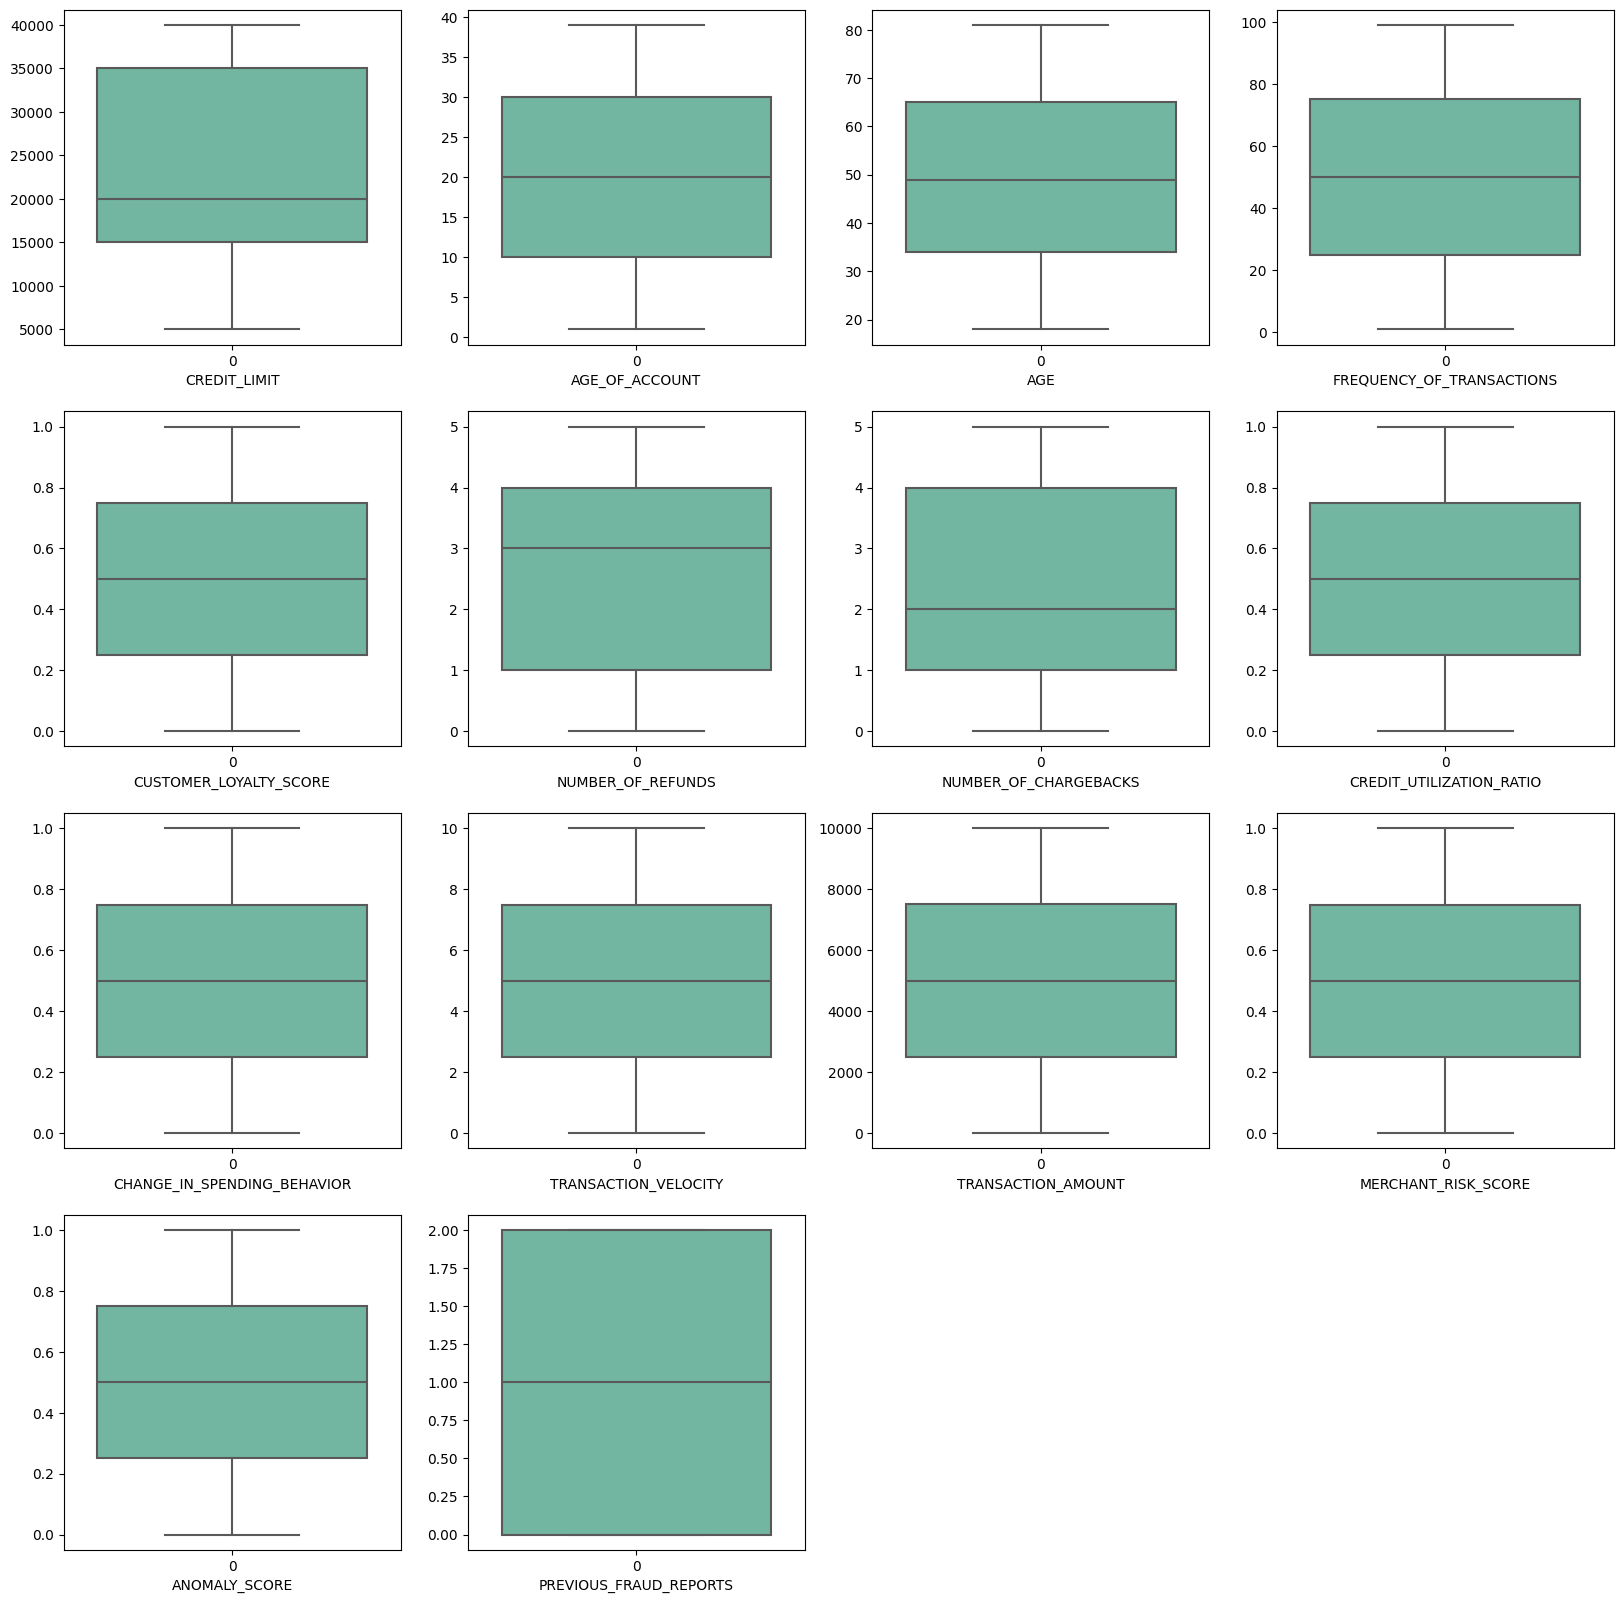

In [22]:
plt.figure(figsize=[20,20])


num_col= ['CREDIT_LIMIT','AGE_OF_ACCOUNT','AGE','FREQUENCY_OF_TRANSACTIONS','CUSTOMER_LOYALTY_SCORE','NUMBER_OF_REFUNDS','NUMBER_OF_CHARGEBACKS','CREDIT_UTILIZATION_RATIO','CHANGE_IN_SPENDING_BEHAVIOR','TRANSACTION_VELOCITY','TRANSACTION_AMOUNT',
 'MERCHANT_RISK_SCORE', 'ANOMALY_SCORE','PREVIOUS_FRAUD_REPORTS']

c=1

for i in num_col:
    plt.subplot(4, 4, c)
    plt.xlabel(i)
    sns.boxplot(Fraud_Detection[i] , palette="Set2")
    c = c + 1
    
plt.show()

In [23]:
Fraud_Detection['FRAUD_FLAG'].value_counts(normalize=True,dropna=False)

FRAUD_FLAG
No     0.946257
Yes    0.053743
Name: proportion, dtype: float64